<a href="https://colab.research.google.com/github/maferrepy/seguradoras2/blob/main/Seguradors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# previsão de novos clientes.:

In [ ]:
#modelagem de dados
import pandas as pd

# Matematica
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#ignorar avisos
from warnings import filterwarnings

# Plano 1 = base de dados
# Plano 2 = Novas entradas
from matplotlib import colors


In [ ]:
Base_dados = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx')

# Não usou
# Serviço
# Furto

In [ ]:
Base_dados.head()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
0,1,69,3930,19005,3
1,2,27,3336,19027,1
2,3,49,3936,19001,3
3,4,60,157,19009,1
4,5,51,3998,19050,2


In [ ]:
Base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id Cliente    500 non-null    int64
 1   Idade         500 non-null    int64
 2   Preço Seguro  500 non-null    int64
 3   CEP           500 non-null    int64
 4   Serviço       500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


In [ ]:
Base_dados.isna().sum()

Id Cliente      0
Idade           0
Preço Seguro    0
CEP             0
Serviço         0
dtype: int64

In [ ]:
Base_dados.describe()

,Id Cliente,Idade,Preço Seguro,CEP,Serviço
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.550000,1939.268000,19024.812000,1.904000
std,144.481833,18.167984,1402.289601,15.079105,0.858054
min,1.000000,18.000000,100.000000,19000.000000,1.000000
25%,125.750000,33.750000,612.000000,19011.000000,1.000000
50%,250.500000,51.000000,1667.500000,19025.000000,2.000000
75%,375.250000,65.000000,3329.500000,19038.000000,3.000000
max,500.000000,80.000000,3998.000000,19050.000000,3.000000


In [ ]:
# font_scale = 1.5> 'tamanho da fonte'
#rc={'figure.figsize':(20,20)}) = tamanho da figura
# bins=20 =  largura do grafico
#colors= 'purple'= cor do grafico

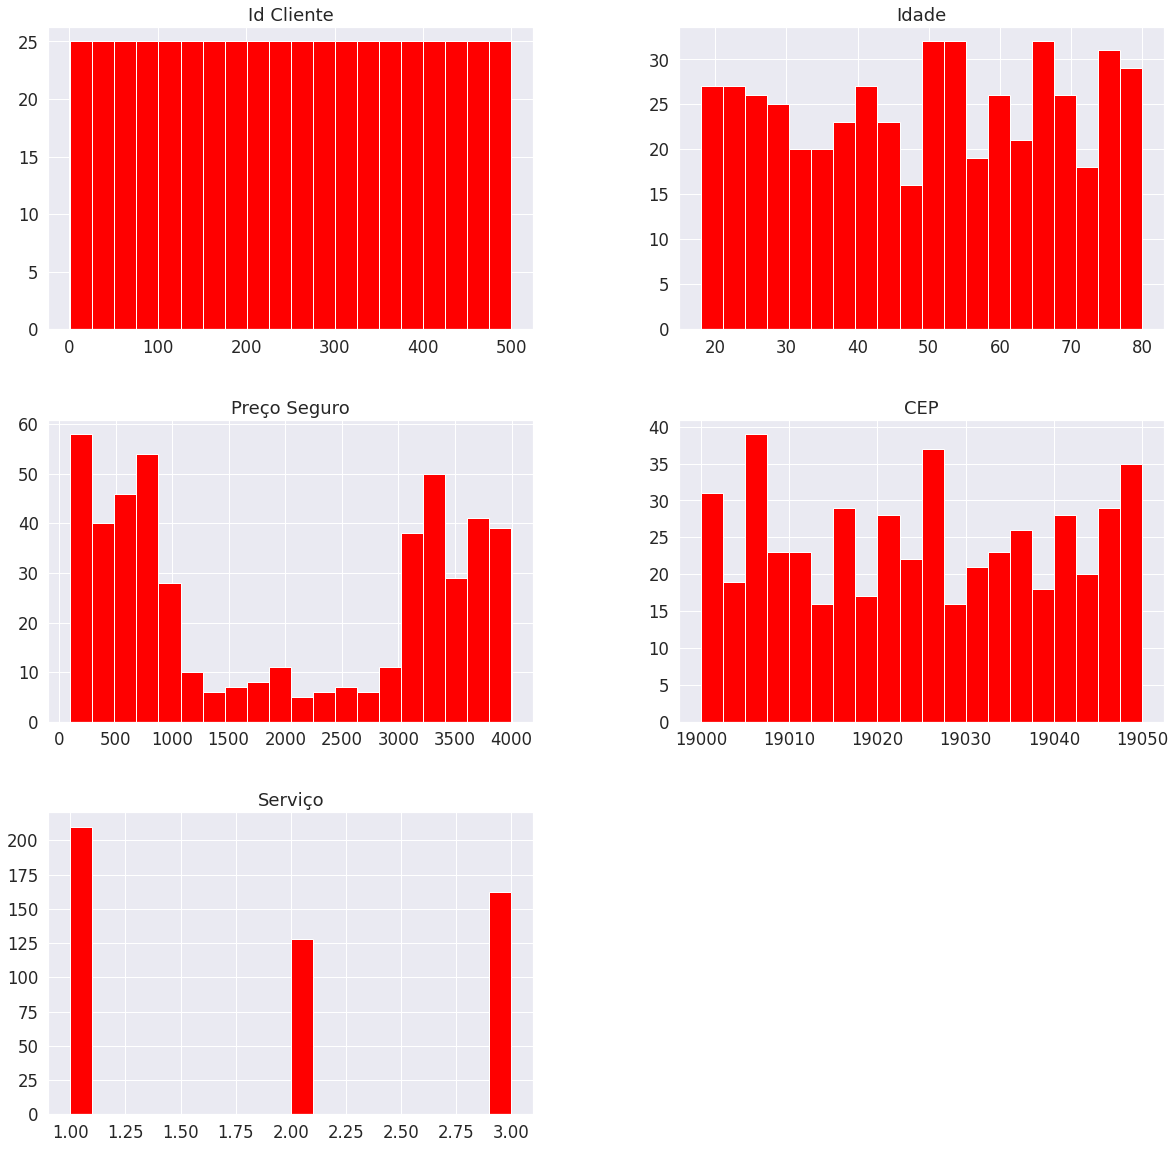

In [ ]:
sns.set(font_scale=1.5, rc={'figure.figsize':(20,20)})
eixo = Base_dados.hist(bins=20, color= 'red')

In [ ]:
#Graficos boox

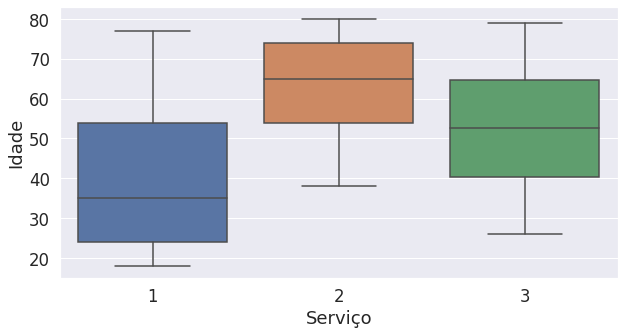

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data = Base_dados , x = 'Serviço', y= 'Idade');

In [ ]:
# o grafico mostra que pessoas de menos idade usam menos os serviços 
# pessoas com idade mais avançada usam mais serviços de reparo


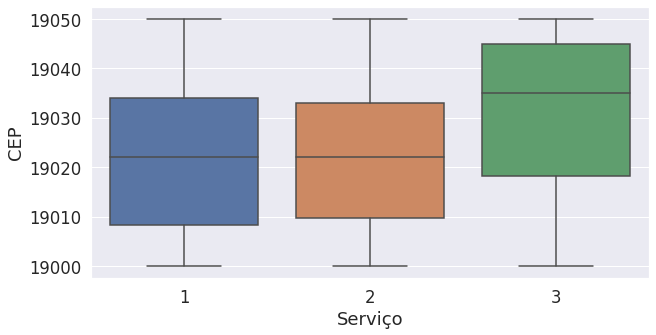

In [ ]:
plt.figure(figsize= (10,5))
sns.boxplot(data = Base_dados , x = 'Serviço', y= 'CEP');

In [ ]:
caracteristicas= Base_dados.iloc[:,1:4].values
previsor = Base_dados.iloc[:,4:5]. values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from pandas.core.common import random_state
x_treinamenos,x_teste, Y_treinamento, y_teste = train_test_split(
    caracteristicas,
    previsor,
    test_size=0.30,
    random_state = 10
    
)
print(len(Base_dados))
print(len(x_treinamenos))
print(len(x_teste))

500
350
150


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
floresta1 = RandomForestClassifier( n_estimators= 500)

In [ ]:
floresta1.fit(x_treinamenos, Y_treinamento)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=500)

[[60  3  1]
 [ 7 22  7]
 [ 0  1 49]]


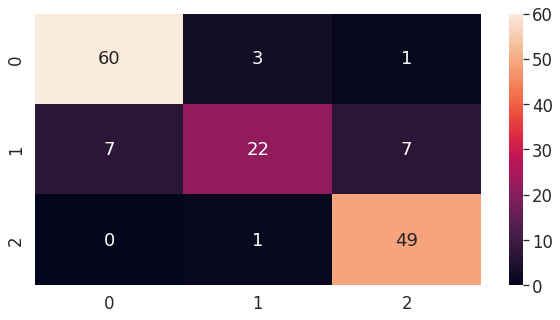

In [ ]:
previsao = floresta1.predict(x_teste)
from sklearn.metrics import confusion_matrix                                       
Matriz_confusão =confusion_matrix( y_teste, previsao)
print(Matriz_confusão)
plt.figure(figsize=(10,5))
sns.heatmap(Matriz_confusão, annot= True)


In [ ]:
# medir a acuracia.
from sklearn.metrics import classification_report
report = classification_report(y_teste, previsao)
print(report)


              precision    recall  f1-score   support

           1       0.90      0.94      0.92        64
           2       0.85      0.61      0.71        36
           3       0.86      0.98      0.92        50

    accuracy                           0.87       150
   macro avg       0.87      0.84      0.85       150
weighted avg       0.87      0.87      0.87       150



In [ ]:
#quais clientes vão usar seguro

In [ ]:
Novas_vendas = pd.read_excel('BaseDados_FlorestaDeDecisão.xlsx', 'Plan2')
Novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP
0,1001,25,801,19001
1,1002,27,1090,19027
2,1003,45,364,19030
3,1004,30,2428,19014
4,1005,32,891,19020


In [ ]:
Prever = Novas_vendas.iloc[:, 1:4].values
Novas_vendas['previsao do modelo'] = floresta1.predict(Prever)


In [ ]:
Novas_vendas['previsao do modelo'].value_counts()

1    15
2     5
3     1
Name: previsao do modelo, dtype: int64

In [ ]:
Novas_vendas.head()

,Id Cliente,Idade,Preço Seguro,CEP,previsao do modelo
0,1001,25,801,19001,1
1,1002,27,1090,19027,1
2,1003,45,364,19030,1
3,1004,30,2428,19014,1
4,1005,32,891,19020,1
